<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/Titanic_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2022
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data for PC(sometimes need to use "/")
df = pd.read_csv('/content/healthcare-修.csv')
#load data for colab
#df = pd.read_csv('')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
1,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
2,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
3,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
4,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5105,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5106,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5107,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


# 1. Quick overview to get a grasp of the data set

key function: pd.info(); pd.astype(); describe(); pd.value_counts()

In [ ]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [ ]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Note: Pclass is categorical data with dummies, so converting to correct data type is required

In [ ]:
# Change data type
df[['gender']]=df[['gender']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [ ]:
# 1.2 Show the correct descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [ ]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109,5109.000000,5109.000000,5109.000000,5109,5109,5109,5109.000000,4908.00000,5109,5109.000000
unique,NaN,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2924,2596,NaN,NaN,1892,NaN
mean,36513.985516,NaN,43.229986,0.097475,0.054022,NaN,NaN,NaN,106.140399,28.89456,NaN,0.048738
std,21162.008804,NaN,22.613575,0.296633,0.226084,NaN,NaN,NaN,45.285004,7.85432,NaN,0.215340
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.30000,NaN,0.000000
25%,17740.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.240000,23.50000,NaN,0.000000
50%,36922.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.880000,28.10000,NaN,0.000000
75%,54643.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.10000,NaN,0.000000


In [ ]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['gender']].value_counts(sort=True))
print('+-----------------------+')
print(df[['ever_married']].value_counts(sort=True))
print('+-----------------------+')
print(df[['work_type']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Residence_type']].value_counts(sort=True))
print('+-----------------------+')
print(df[['smoking_status']].value_counts(sort=True))

gender
Female    2994
Male      2115
dtype: int64
+-----------------------+
ever_married
Yes             3353
No              1756
dtype: int64
+-----------------------+
work_type    
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64
+-----------------------+
Residence_type
Urban             2596
Rural             2513
dtype: int64
+-----------------------+
smoking_status 
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
dtype: int64


# Tips: Control DataFrame

In [ ]:
# Tips: how to call column
# column name
df[['Pclass','Age','Fare']].head()

# use loc + column name
#df.loc[:,['Pclass','Age','Fare']].head()

# use iloc to call index
#df.iloc[:,[0,2,4]].head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [ ]:
# call row
# call row by specific index
#df.loc[0,['Pclass','Age','Fare']]
#df.loc[[0,1],['Pclass','Age','Fare']]

#call row by a range of index
#df.loc[0:4,['Pclass','Age','Fare']]

# call row by defination
index=range(0,5)
df.loc[index,['Pclass','Age','Fare']]

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


# Exercise: Calling specific columns (Age, SibSp,Parch,Fare)

In [ ]:
# Practice
df[['Age','SibSp','Parch','Fare']].head()
df.loc[:,['Age','SibSp','Parch','Fare']].head()
df.iloc[:,[2,3,4,5]].head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [ ]:
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df #存新的

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
2,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
3,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
5,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
6,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5104,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5105,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5107,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [ ]:
# Recheck the descriptive statistics
new_df[['age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,30.147852,0.503497,0.415584,37.305257
std,14.179637,0.893442,0.842091,56.336078
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.900000
75%,39.000000,1.000000,1.000000,37.004200
max,80.000000,5.000000,6.000000,512.329200


In [ ]:
# Recheck the descriptive statistics
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         468
1         280
2         253
dtype: int64
+-----------------------+
Sex   
male      621
female    380
dtype: int64
+-----------------------+
Embarked
S           756
C           199
Q            46
dtype: int64
+-----------------------+
Survived
no          605
yes         396
dtype: int64


In [ ]:
# 2.2 Using unique function to check category label
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['3' '1' '2']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['no' 'yes']


In [ ]:
#2.3 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,1,0,0,0,1,1,0,0,0,1
1300,3.0,1,1,13.7750,0,0,1,1,0,0,0,1,0,1
1302,37.0,1,0,90.0000,1,0,0,1,0,0,1,0,0,1
1303,28.0,0,0,7.7750,0,0,1,1,0,0,0,1,1,0


Note: get_dummies function generates the onehotencode style dummies

In [ ]:
# Export to CSV file for PC Note: preset folder path is required
dummied_new_df.to_csv('C:\機器學習\TA\Titian-demo',index=False, header=True)
# Export to CSV file for Colab
dummied_new_df.to_csv('Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


# Addition tips for data preprocessing

Sometimes deleting all missing value is not the only optimal option during data preprocessing, so this section provides two additional tips for dealing with missing value. 1. Find the specific data point in a column  2. Fill the missing value

In [ ]:
# Tips: Find the specific data point using np.isnan function
# Find missing value with numpy: row index
np.where(np.isnan(df['Fare']))

(array([1043]),)

In [ ]:
# Call the specific data point via row index
df.loc[1043,:]

Pclass         3
Sex         male
Age          NaN
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Survived     yes
Name: 1043, dtype: object

In [ ]:
# Drop via row index
Tip_df=df.drop([1043])
np.where(np.isnan(Tip_df['Fare']))

(array([], dtype=int64),)

In [ ]:
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   object 
 1   Sex       1308 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 92.0+ KB


In [ ]:
# Tips: Deal with missing value by filling it
Tip_df=Tip_df.fillna({'Age':round(Tip_df['Age'].mean(),0)})
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   object 
 1   Sex       1308 non-null   object 
 2   Age       1308 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1308 non-null   object 
 7   Survived  1308 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 92.0+ KB


# Addition tips for data preprocessing: outlier detection with 1.5 IQR rule

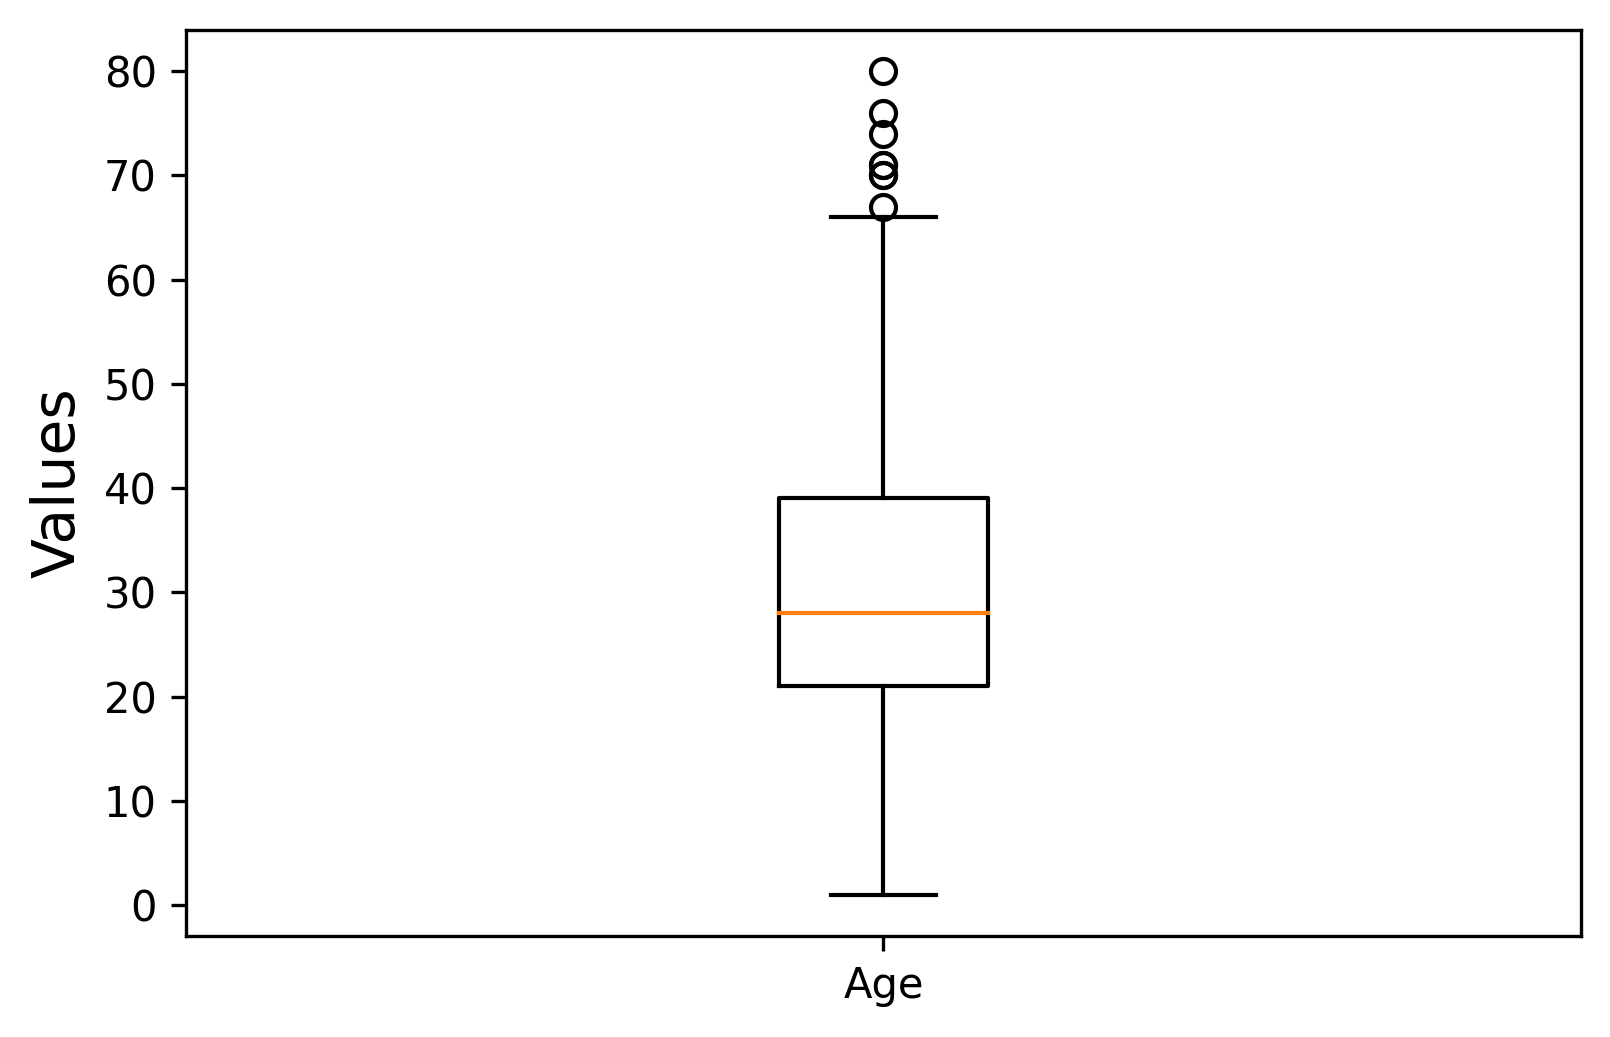

In [ ]:
# Plot box plot
plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(new_df.iloc[:,2])
plt.xticks([1], ['Age'])
plt.show()

In [ ]:
# get Min
qMin=np.quantile(new_df.iloc[:,2], 0)
# Calculate Q1
q1 = np.quantile(new_df.iloc[:,2], 0.25)
# Calculate Q2
q2 = np.quantile(new_df.iloc[:,2], 0.5)
# Calculate Q3
q3 = np.quantile(new_df.iloc[:,2], 0.75)
# get Max
qMax=np.quantile(new_df.iloc[:,2], 1)
# Calculate IQR
iqr = q3-q1
# Calculate upper and lower whiskers
upper_bound = q3+(1.5*iqr) #直接在EXCEL刪除66.0
lower_bound = q1-(1.5*iqr)
print('Min:',qMin,', Q1:',q1,', Q2:',q2,', Q3:',q3,', Max:',qMax)
print('IQR:',iqr,'Upper:',upper_bound,'Lower:',lower_bound)

Min: 1.0 , Q1: 21.0 , Q2: 28.0 , Q3: 39.0 , Max: 80.0
IQR: 18.0 Upper: 66.0 Lower: -6.0


# 3. Set dependent variable(Y or target) & independent variable(X)

In [ ]:
# Qucik recap
dummied_new_df.head() #是生存用1

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0


Note: Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.  

In [ ]:
#set x (make prediction)
x=dummied_new_df.drop(['Survived_no','Survived_yes'],axis=1).copy()
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,1,0,0,0,1,1,0,0
1300,3.0,1,1,13.7750,0,0,1,1,0,0,0,1
1302,37.0,1,0,90.0000,1,0,0,1,0,0,1,0
1303,28.0,0,0,7.7750,0,0,1,1,0,0,0,1


In [ ]:
#set y (want to predict)
y=dummied_new_df['Survived_yes'].copy()
y

0       0
1       1
2       1
3       1
4       0
       ..
1298    1
1300    1
1302    1
1303    0
1305    0
Name: Survived_yes, Length: 1001, dtype: uint8

# 3. Spilt the data into training & testing set

key function: train_test_split()

key parameters for train_test_spilt(): test_size; random_state

In [ ]:
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4) #random_state:重複跑幾次

In [ ]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 483, 1: 317})
------------------------------------
y_test : Counter({0: 122, 1: 79})


# 4. Fit the model

key function: DecisionTreeClassifier(); accuracy_score(); precision_score(); f1_score(); sensitivity_score(); specificity_score(); confusion_matrix(); cross_val_score()

In [ ]:
# 4.1 Fit the model with DecisionTreeClassifier function #CART #分類問題:Classifier #random_state不用管
model=DecisionTreeClassifier(criterion='gini',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,random_state=4)
model.fit(x_train,y_train)

NameError: ignored

Note: The parameters are setted default

In [ ]:
aa\

In [ ]:
# 4.2 Show result: out-of-sample testing
# Training result
training_prediction=model.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1) #pos_label=1，代表目標Y是存活1
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix #TP反的:看PPT
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=model.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Training result:
Training ACC: 97.88
Training f1s: 97.24
Training pre: 100.0
Training sen: 94.64
Training spe: 100.0

Training confusion matrix:
[[483   0]
 [ 17 300]]
+-----------------------------------------+
Testing result:
Testing ACC: 70.15
Testing f1s: 59.46
Testing pre: 63.77
Testing sen: 55.7
Testing spe: 79.51

Testing confusion matrix:
[[97 25]
 [35 44]]


In [ ]:
# 4.3 Perform  five fold cross validation on training data
CV5F_acc=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy') #CV=5折，作業改成3
print('Each fold ACC:',CV5F_acc)
print('Average ACC:',round((np.mean(CV5F_acc))*100,2),'+/-',round((np.std(CV5F_acc))*100,2))

Each fold ACC: [0.68125 0.70625 0.65625 0.6625  0.675  ]
Average ACC: 67.63 +/- 1.74


Note: Changing parameter in scoring for different metrics. recall; f1; precision

# Important!! Very Important!!! Must keep in mind!!!!!

In [ ]:
from sklearn.metrics import recall_score
#sensitivity
recall_pos=recall_score(y_test,testing_prediction,pos_label=1)
#specificity
recall_neg=recall_score(y_test,testing_prediction,pos_label=0)
print('When set pos_label=1')
print('Output is equal to Sensitivity:',round(recall_pos*100,2))
print('+-----------------------------------+')
print('When set pos_label=0')
print('Output is equal to Specificity:',round(recall_neg*100,2))

When set pos_label=1
Output is equal to Sensitivity: 55.7
+-----------------------------------+
When set pos_label=0
Output is equal to Specificity: 79.51


# Addition tips for plotting confusion matrix

# IMPORTANT!!!!: In python, true positive is C11; true negative is C00; false positive is C01; false negative is C10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


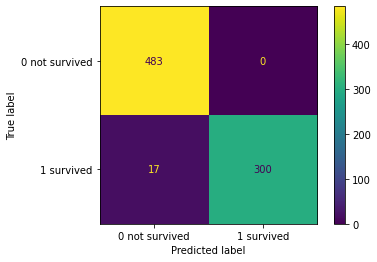

In [ ]:
# Training confusion matrix
plot_confusion_matrix(model,x_train,y_train,display_labels=["0 not survived","1 survived"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


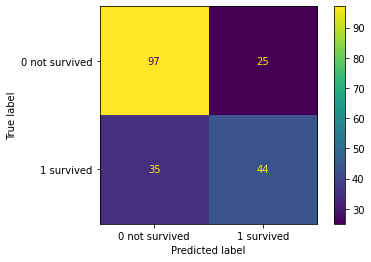

In [ ]:
# Testing confusion matrix
plot_confusion_matrix(model,x_test,y_test,display_labels=["0 not survived","1 survived"])

# 5. Hyper parameter tuning

At this point, you should understand the basic functions that you will need when modeling. In real case scenario, this section provides the basic modeling scheme and combines what you have learned in section 4.   

In [ ]:
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
#設三個超參數，共有27個模型挑一最好
# 5.2 Manually peforming hyper parameter tuning
model_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=1,random_state=4)
model_cart.fit(x_train,y_train)
CV5F_cart_acc=cross_val_score(model_cart,x_train,y_train,cv=5,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV5F_cart_acc)
print('Average ACC:',round((np.mean(CV5F_cart_acc))*100,2),'+/-',round((np.std(CV5F_cart_acc))*100,2))
print('Depth: ',model_cart.get_depth())
print('Leaves:',model_cart.get_n_leaves())

NameError: ignored

Note: After finding the best optimal hyper parameter set, you should use the testing data set to evaluate the final model.

Testing ACC: 75.12
Testing f1s: 67.95
Testing pre: 68.83
Testing sen: 67.09
Testing spe: 80.33


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


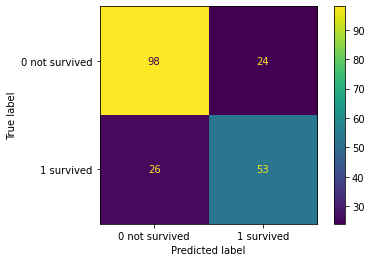

In [ ]:
# 5.3 Evaluate with testing data set
final_model_testing_prediction=model_cart.predict(x_test)
final_model_testing_acc=accuracy_score(y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=sensitivity_score(y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=specificity_score(y_test,final_model_testing_prediction,pos_label=1)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
plot_confusion_matrix(model_cart,x_test,y_test,display_labels=["0 not survived","1 survived"])

# 6. Visualize the decision tree

Key function: tree.plot_tree

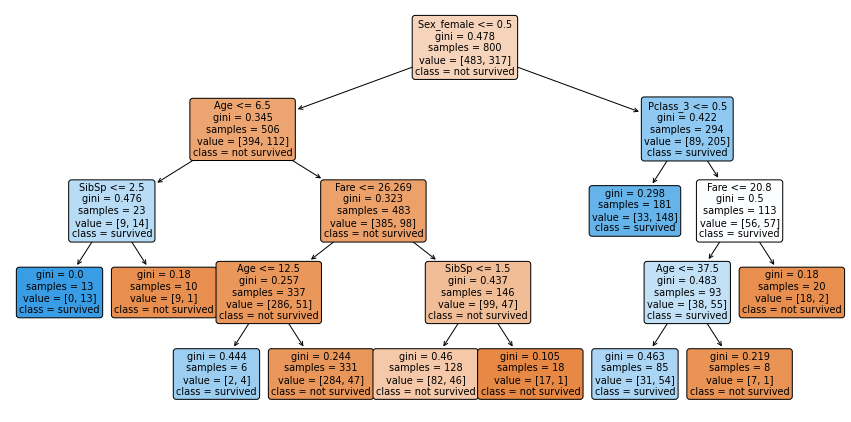

In [ ]:
# Plot tree
plt.figure(figsize=(15,7.5))
tree.plot_tree(model_cart,filled=True,rounded=True,class_names=["not survived","survived"],feature_names=x.columns);

Note: This tree is the visualization of the training model not full model!

In [ ]:
# For each node, go left when the condition is true
male=Counter(x_train['Sex_male'])
female=Counter(x_train['Sex_female'])
print('Training data')
print('Male:  ',male[1])
print('Female:',female[1])

NameError: ignored

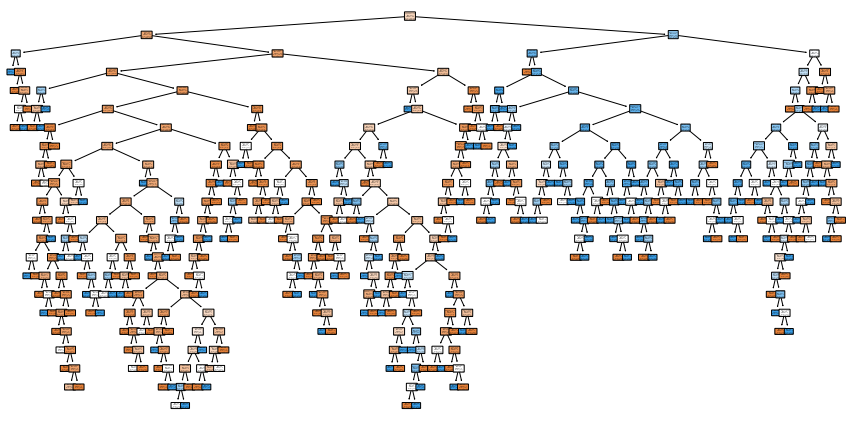

In [ ]:
# Tree without hyper parameter tuning
plt.figure(figsize=(15,7.5))
tree.plot_tree(model,filled=True,rounded=True,class_names=["not survived","survived"],feature_names=x.columns);